# 소셜게임의 매상 분석(검증형 데이터 분석)
* 가상의 소셜게임 회사가 운영하는 가상의 소셜게임인 '퍼즐컬렉션'이 이번달에 들어 매상이 감소했습니다. 시장 환경이나 게임의 상태를 고려하면 아직은 더 성장할 것으로 예상했기 때문에 사내에서도 큰 문제로 인식하고 있습니다. 원인을 밝혀서 대책을 세우자며 분석 담당자에게 의뢰했습니다.

## 문제 발견

* 문제
  - 지난달에 비해 매상이 감소했다. (사실)
* 가설
  - 광고에 문제가 생겼다. (가설)
  - 매월 테마를 바꿔서 개최하던 게임의 이벤트에 문제가 생겼다. (가설)
* 타 부서들과 질의응답 결과
  - 이달은 지난달에 비해 광고를 적게 했다. 
  - 이벤트 내용은 지난달과 거의 비슷하다. 
  - '광고에 문제가 생겼다.'라는 가설을 분석 테마로 선정

## 데이터 수집과 가공
### 데이터 분석 스토리 정리
* 문제
  - 지난달에 비해 매상이 감소했다. (사실)
  - 이달은 지난달에 비해 광고를 적게 했다. (사실)
  - 그래서 신규 유저수가 줄어들었다. (가설)
* 해결책
  - 광고를 지난달과 같은 수준으로 한다.
* 최종 스토리 정리
  - 퍼즐컬렉션의 매상이 지난달에 비해 줄어들었다. (사실)
  - 매상 내역을 보았더니 신규 유저의 매상이 감소했다. (가설)
  - 광고를 지난달과 같은 수준으로 한다. (해결책)
* 분석에 필요한 데이터 검토
  - DAU(Daily Active User):하루에 한 번 이상 게임을 이용한 유저 데이터
  - DPU(Daily Payment User):하루에 1원 이상 지불한 유저 데이터
  - Install:유저별로 게임을 이용하기 시작한 날짜가 기록된 데이터

In [1]:
#분석에 필요한 데이터 수집
#필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
#CSV 파일 읽어 들이기
dau = pd.read_csv('section3-dau.csv')
dpu = pd.read_csv('section3-dpu.csv')
install = pd.read_csv('section3-install.csv')

In [2]:
#각각의 데이터 확인
print(dau.shape,dpu.shape ,install.shape)

(139112, 3) (884, 4) (29330, 3)


In [3]:
# 분석에 필요한 데이터 가공(전처리)
# 유저(DAU)데이터에 이용시작(Install) 데이터 결합하기
dau.install = pd.merge(dau, install, on=['user_id', 'app_name'],how='left')

/Users/maaanseop/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# 위 데이터에 과금(DPU) 데이터 다시 결합하기
dau.install.payment = pd.merge(dau.install, dpu, on=['log_date','app_name','user_id'], how='left')
dau.install.payment

/Users/maaanseop/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-01,game-01,13491,2013-06-01,NaN
2,2013-06-01,game-01,7006,2013-05-03,NaN
3,2013-06-01,game-01,117,2013-04-17,NaN
4,2013-06-01,game-01,13492,2013-06-01,NaN
...,...,...,...,...,...
139290,2013-07-31,game-01,29326,2013-07-31,NaN
139291,2013-07-31,game-01,29327,2013-07-31,NaN
139292,2013-07-31,game-01,29328,2013-07-31,NaN
139293,2013-07-31,game-01,29329,2013-07-31,NaN


In [5]:
# 비과금 유저(결측값) 확인
dau.install.payment.isnull().sum()
# 비과금 유저의 과금액에 0 넣기
dau.install.payment2 = dau.install.payment.fillna(0)
dau.install.payment2 = dau.install.payment2[['log_date','user_id','install_date','payment']]
dau.install.payment2

/Users/maaanseop/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


,log_date,user_id,install_date,payment
0,2013-06-01,116,2013-04-17,0.0
1,2013-06-01,13491,2013-06-01,0.0
2,2013-06-01,7006,2013-05-03,0.0
3,2013-06-01,117,2013-04-17,0.0
4,2013-06-01,13492,2013-06-01,0.0
...,...,...,...,...
139290,2013-07-31,29326,2013-07-31,0.0
139291,2013-07-31,29327,2013-07-31,0.0
139292,2013-07-31,29328,2013-07-31,0.0
139293,2013-07-31,29329,2013-07-31,0.0


In [6]:
# 월차로 변경하기
dau.install.payment2['log_date']=pd.to_datetime(dau.install.payment2["log_date"])
dau.install.payment2['install_date']=pd.to_datetime(dau.install.payment2["install_date"])
dau.install.payment2['log_date']=dau.install.payment2['log_date'].dt.strftime('%Y-%m')
dau.install.payment2['install_date']=dau.install.payment2['install_date'].dt.strftime('%Y-%m')
# 월차별 데이터 집계하기
df = dau.install.payment2.groupby(['log_date','user_id','install_date','payment'])['payment'].sum().unstack()

In [7]:
# 월차별 데이터에 신규 유저인지 기존 유저인지 구분하는 항목 추가하기
a=[]
for i in range(len(dau.install.payment2['log_date'])):
    a.append(dau.install.payment2['log_date'][i]==dau.install.payment2['install_date'][i])
b=[]
for i in range(len(a)):
    if a[i]==True:
        b.append('install')
    else:
        b.append('existing')

b=pd.Series(b)
dau.install.payment2['user_type']=b

df = dau.install.payment2
df

,log_date,user_id,install_date,payment,user_type
0,2013-06,116,2013-04,0.0,existing
1,2013-06,13491,2013-06,0.0,install
2,2013-06,7006,2013-05,0.0,existing
3,2013-06,117,2013-04,0.0,existing
4,2013-06,13492,2013-06,0.0,install
...,...,...,...,...,...
139290,2013-07,29326,2013-07,0.0,install
139291,2013-07,29327,2013-07,0.0,install
139292,2013-07,29328,2013-07,0.0,install
139293,2013-07,29329,2013-07,0.0,install


## 데이터 분석

* 그래프로 데이터를 시각화하기



한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [8]:
import platform
from matplotlib import font_manager, rc
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<AxesSubplot:xlabel='log_date'>

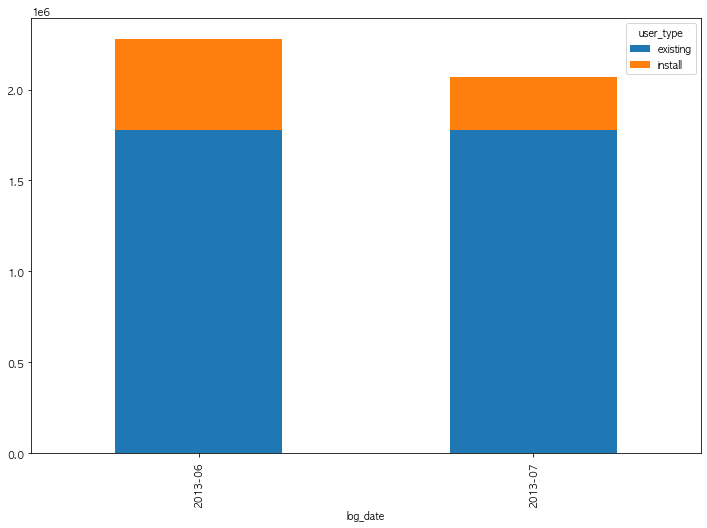

In [10]:
#퍼즐컬렉션의 매상 비교 (지난달 / 이달)
df2= df.groupby(['log_date','user_type'])['payment'].sum().unstack()
df2.plot(kind='bar', figsize=(12,8), stacked=True)

In [11]:
#신규 유저 데이터만 골라서 히스토그램을 통해 지난달과 이달 매상 비교 
#신규 유저 데이터 추출
df3 =df[df['user_type'] == 'install']
df3 =df3[df3['payment'] > 0 ]
df4 = df3[df3['log_date'] == '2013-06']
df5 = df3[df3['log_date'] == '2013-07'] 

In [12]:
a6=df4.groupby(['log_date','user_id','user_type'])['payment'].sum().unstack()
a7=df5.groupby(['log_date','user_id','user_type'])['payment'].sum().unstack()
a7

user_type         install
log_date user_id         
2013-07  22808      810.0
         23249     2430.0
         23350     7330.0
         23385     1620.0
         23485     5710.0
         24112      810.0
         24278     2430.0
         24310     2430.0
         24443    16280.0
         24503      810.0
         24730     9810.0
         24817      810.0
         24840     6480.0
         24996     9810.0
         25145    15240.0
         25293     5710.0
         25310      810.0
         25381      810.0
         25612      810.0
         25674      810.0
         25875     1620.0
         25928     1620.0
         26065     8140.0
         26151    48810.0
         26291    77670.0
         26302    27330.0
         26488     1620.0
         26852     9850.0
         26966      810.0
         27084      810.0
         27310      810.0
         27441     5710.0
         27787     3240.0
         27813     1620.0
         27988     1620.0
         28342      810.0
         28371      810.0
         28433     6520.0
         29154      810.0

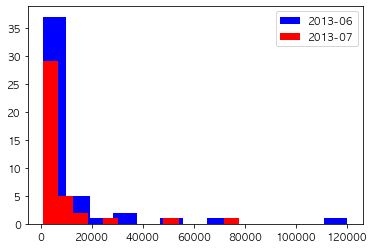

In [13]:
#월별 신규 유저수 비교
plt.hist(a6,color='blue',bins=13,label='2013-06' ,histtype='bar')
plt.hist(a7,color='red',bins=13,label='2013-07' ,histtype='bar')
plt.legend()
plt.show()

## 데이터 분석 결과
- 퍼즐컬렉션의 매상이 지난달에 비해 떨어졌다. (사실)
- 매상 구조를 보았더니 신규 유저의 매상의 감소했으며, 그중에서도 20,000원 이하의 라이트 유저의 감소 영향이 컸다. (사실)
- 광고를 지난달과 같은 수준으로 한다. (데이터 분석으로 얻어낸 신빙성 높은 해결책)

## 액션
> 신규 유저의 과금자수가 감소하였고, 특히 소액과금자(20,000원 이하의 라이트 유저)가 줄고 있음을 알게 되었다. 따라서 광고를 지난달과 같은 수준으로 하여 신규 유저를 늘릴 가능성이 있고 그렇다면 소액과금자가 늘어나 매상이 지난달과 같은 수준으로 회복할 것이다.


## 정리
#### 히스토그램을 통한 데이터 분석 진행
>지난달과 비교하여 매상이 떨어진 것을 문제로 정의하여 그 원인을 찾아보았고, 비지니스의 데이터 분석에서 중요한 것은 데이터를 분석하기 전에 관계부서와 가급적 많은 질의응답을 통해 사실을 파악하는 것이라고 느꼈음, 또한 그런 정보를 파악한 후 실현 가능한 스토리를 관계자들과 함께 생각하고, 데이터를 활용해서 검증하는 것 또한 중요하다고 느낌.